# Реалізація алгоритиму LZW

In [3]:
import matplotlib.pyplot as plt
from datetime import datetime
import sys

In [26]:
class LZW:
    """
    LZW class
    """
    def __init__(self, string):
        """
        Constructor
        """
        s = {x for x in string}
        sorted_list = sorted(s)
        self.dictionary_size = len(sorted_list)
        self.dictionary = {sorted_list[i]: i for i in range(self.dictionary_size)}
        self.string = string

    def encode(self):
        """
        Encode input string
        """
        result_list = []
        sequence = ""
        for character in self.string:
            new_sequence = sequence + character
            if new_sequence in self.dictionary:
                sequence = new_sequence
            else:
                result_list.append(self.dictionary[sequence])
                self.dictionary[new_sequence] = self.dictionary_size
                self.dictionary_size += 1
                sequence = character
        if sequence:
            result_list.append(self.dictionary[sequence])
        res = ""
        return result_list

    def decode(self, code):
        """
        Decodes encode to string
        """
        reverse_dict = {v: k for k, v in self.dictionary.items()}
        message = ""
        i = 0
        while i < len(code):
            if code[i] in reverse_dict:
                message += reverse_dict[code[i]]
                i += 1
            else:
                raise ValueError("Invalid code")
        return message



## Виконання алгоритму для файлів різного розміру

In [39]:
def check_lzw_encode():
    data_file = ["test1.txt", "test2.txt", "test3.txt"]
    for i in data_file:
        with open(i, "r", encoding="UTF-8") as data:
            test_data = str([i.strip() for i in data.readlines()])
        print([len(test_data)])
        start_time = datetime.now()
        encoded = LZW(test_data).encode()
        end_time = datetime.now()
        print('algorithm work time: {}'.format(end_time - start_time))
        print(f"text size encoded file: {sys.getsizeof(encoded)/1000000} mb")
        print(f"text size start file with length : {sys.getsizeof(test_data)/1000000} mb")
        print(f'на скільки повідомлення закодоване: {100-((len(encoded)*100)/(len(test_data)))}')
check_lzw_encode()

[2208]
algorithm work time: 0:00:00.000620
text size encoded file: 0.00108 mb
text size start file with length : 0.002257 mb
на скільки повідомлення закодоване: 94.61050724637681
[520200]
algorithm work time: 0:00:00.141721
text size encoded file: 0.037208 mb
text size start file with length : 0.520249 mb
на скільки повідомлення закодоване: 99.1236063052672
[7489724]
algorithm work time: 0:00:03.051528
text size encoded file: 0.901144 mb
text size start file with length : 7.489773 mb
на скільки повідомлення закодоване: 98.60852015374665


## Час роботи, розмір файлу до і після стиску на файлі розміром 7489724 елементів з буфером розміром


In [35]:
data_file = "test.txt"
with open(data_file, "r", encoding="UTF-8") as data:
    test_data = str([i.strip() for i in data.readlines()])
print(f"length of file: {len(test_data)}")
start_time = datetime.now()
encoded = LZW(string=data_file).encode()
end_time = datetime.now()
print('algorithm work time: {}'.format(end_time - start_time))
print(f"text size encoded file: {sys.getsizeof(encoded)/1000000} mb, bufer{1000}")
print(f"text size start file with length : {sys.getsizeof(test_data)/1000000} mb, bufer{1000}\n")
print(f'на скільки повідомлення закодоване: {100 - ((100 * (len(LZW(string=data_file).encode())))/((len(test_data))))} %')
                

length of file: 7489724
algorithm work time: 0:00:00.000096
text size encoded file: 0.00012 mb, bufer1000
text size start file with length : 7.489773 mb, bufer1000

на скільки повідомлення закодоване: 99.99989318698526 %


## Побудова графіка на співвідношення часу виконання алгоритму до розміру фаула

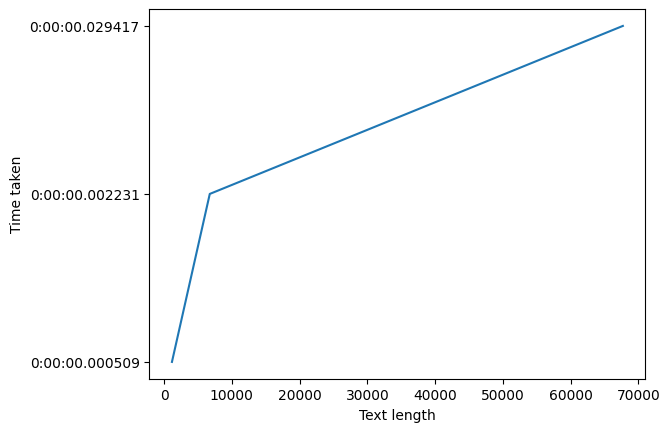

In [34]:
def test_lzw():
    files = ["test1.txt", "test2.txt", "test3.txt"]
    time_taken = []
    length = []
    for file_path in files:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = file.read()
        length.append(len(data))
        start = datetime.now()
        lzw = LZW(data)
        lzw.encode()
        end = datetime.now()
        time_taken.append(str(end - start))
    plt.xlabel('Text length')
    plt.ylabel('Time taken')
    x = length
    y = time_taken
    plt.plot(x, y)
test_lzw()